In [2]:
# Machine Failure Classification - Jefrey Bethel

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/content/drive/MyDrive/mlcourse/predictive_maintenance.csv")

In [5]:
df.shape

(10000, 10)

In [6]:
df.sample(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
4039,4040,L51219,L,301.9,310.8,1567,39.3,9,0,No Failure
3430,3431,H32844,H,301.6,310.6,1821,26.2,171,0,No Failure
6847,6848,L54027,L,301.2,311.4,1757,28.0,6,0,No Failure
1860,1861,L49040,L,297.8,307.6,1607,30.3,62,0,No Failure
439,440,M15299,M,297.4,308.3,1535,34.6,51,0,No Failure
1382,1383,L48562,L,298.8,310.1,1653,30.3,119,0,No Failure
780,781,M15640,M,296.9,308.0,1409,50.7,43,0,No Failure
5135,5136,L52315,L,304.1,313.3,1883,24.5,190,0,No Failure
5540,5541,L52720,L,302.4,311.8,1493,38.4,132,0,No Failure
1115,1116,M15975,M,296.4,307.3,2077,19.1,80,0,No Failure


In [ ]:
df['Failure Type'].value_counts()

: 

In [8]:
# Data Cleaning:
# There are no missing values
# Removed UDI and PRODUCT_ID because redundant
# Failure_Type = Categorial Nominal Data -> Required Label Encoder

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
df.describe() #WORKS FOR NUMERICAL VALUES

# Data Cleaning:
#

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [10]:
df.duplicated().sum() #FIND DUPLICATES

np.int64(0)

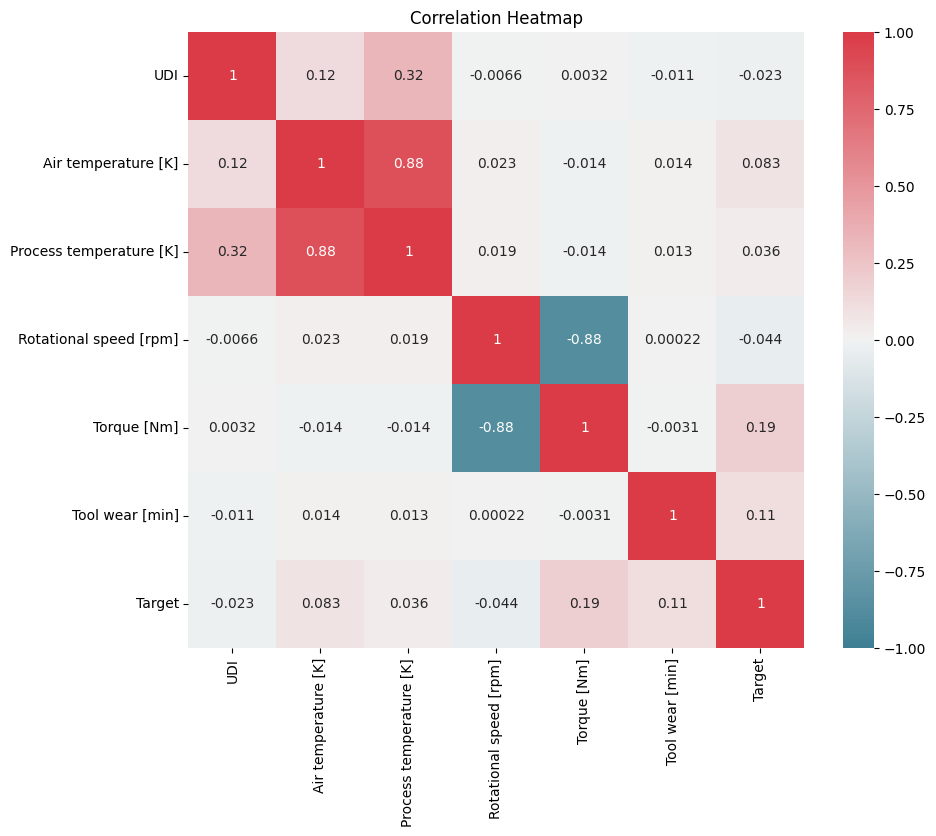

In [11]:
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            vmin=-1.0, vmax=1.0, square=True, annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [12]:
# import sys
# !{sys.executable} -m pip install -U ydata-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [13]:
# import numpy as np
# import pandas as pd
# from ydata_profiling import ProfileReport

# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("your_report.html")

<Axes: xlabel='Torque [Nm]', ylabel='Count'>

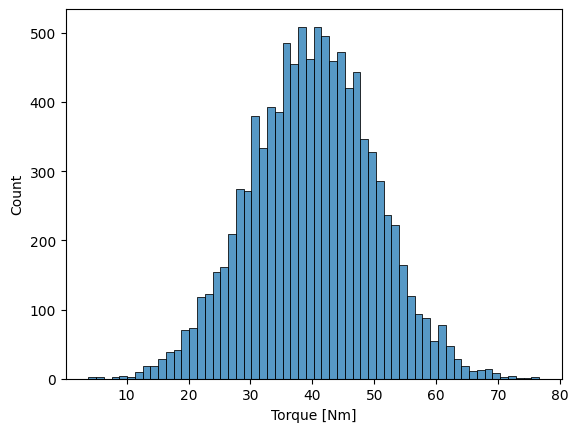

In [14]:
sns.histplot(df['Torque [Nm]'])


In [15]:
categorical_cols = ['Type']
numerical_cols = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']


from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer


numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()
label_transformer = LabelEncoder()

df['Target'] = label_transformer.fit_transform(df['Target'])
df['Failure Type'] = label_transformer.fit_transform(df['Failure Type'])


In [16]:
preprocessor = ColumnTransformer(
       transformers=[
           ('num', numerical_transformer, numerical_cols),
           ('cat', categorical_transformer, categorical_cols)
])


X = preprocessor.fit_transform(df)
X = pd.DataFrame(X, columns=(numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_cols))))


In [17]:
X = X.assign(Target=df['Target'], Failure_Type=df['Failure Type'])
X.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_H,Type_L,Type_M,Target,Failure_Type
0,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0.0,0.0,1.0,0,1
1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0.0,1.0,0.0,0,1
2,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0.0,1.0,0.0,0,1
3,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0.0,1.0,0.0,0,1
4,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0.0,1.0,0.0,0,1


In [18]:
X['Failure_Type'].value_counts()

,count
Failure_Type,
1,9652
0,112
3,95
2,78
5,45
4,18


np.float64(-0.009516595840059962)

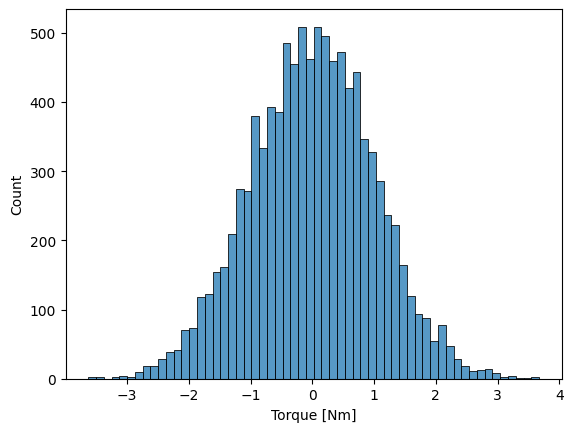

In [19]:
sns.histplot(X['Torque [Nm]'])
X['Torque [Nm]'].skew()

np.float64(0.11427392052155307)

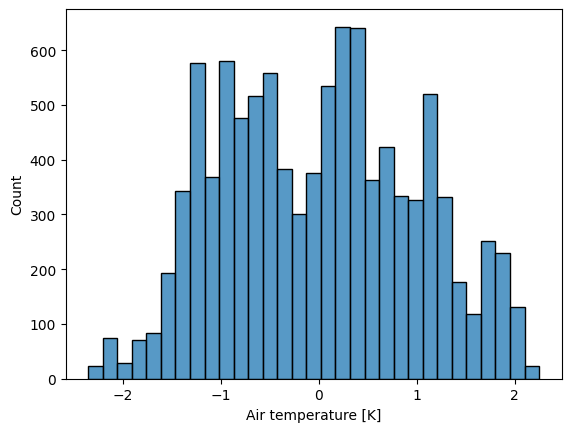

In [20]:
sns.histplot(X['Air temperature [K]'])
X['Air temperature [K]'].skew()

np.float64(0.015027267769234067)

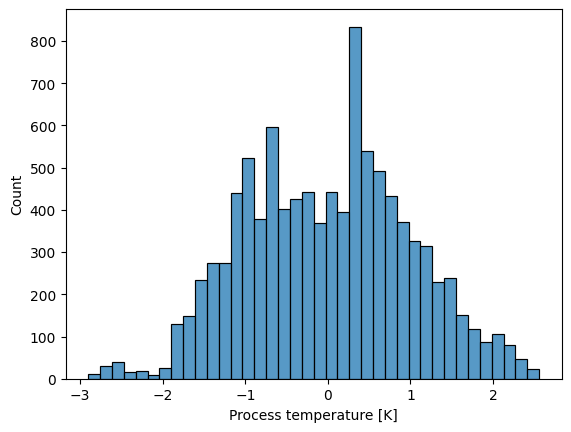

In [21]:
sns.histplot(X['Process temperature [K]'])
X['Process temperature [K]'].skew()

np.float64(1.9931710047137523)

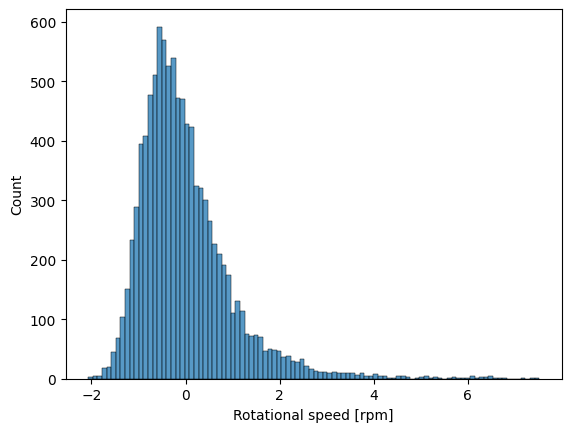

In [22]:
sns.histplot(X['Rotational speed [rpm]'])
X['Rotational speed [rpm]'].skew()

np.float64(0.027292239050452447)

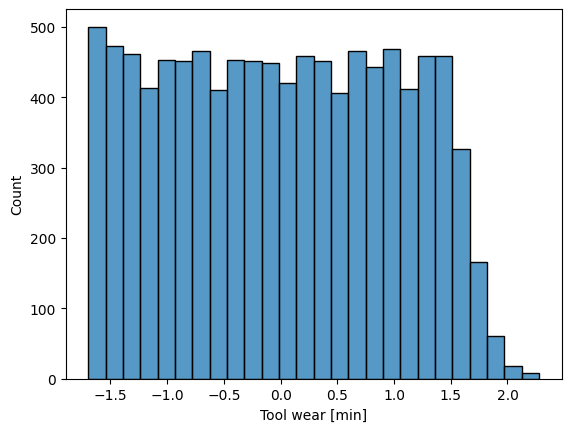

In [23]:
sns.histplot(X['Tool wear [min]'])
X['Tool wear [min]'].skew()

In [24]:
X_T = X.drop(columns=['Target', 'Failure_Type'])
y_T = X[['Target']]
y_T = y_T.values.ravel()

y2_T = X[['Failure_Type']]

# f, ax = plt.subplots(figsize=(10, 8))
# corr = X_T.corr()
# sns.heatmap(corr,
#     cmap=sns.diverging_palette(220, 10, as_cmap=True),
#     vmin=-1.0, vmax=1.0,
#     square=True, ax=ax)

In [25]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {
   'Random Forest': RandomForestClassifier(),
   'Logistic Regression': LogisticRegression(C=0.1, penalty='l2'),
   'SVC': SVC(),
   'Decision Tree': DecisionTreeClassifier(),
   'KNN': KNeighborsClassifier(),
   'Naive Bayes': GaussianNB(),
   'Gradient Boosting': GradientBoostingClassifier()
}

# X.info()

In [26]:
for name, model in models.items():
 accuracy = cross_val_score(model, X_T, y_T, cv=5, scoring='accuracy').mean()
 precision = cross_val_score(model, X_T, y_T, cv=5, scoring='precision').mean()
 print(f'{name}: Accuracy = {accuracy}, Precision = {precision}')


Random Forest: Accuracy = 0.8961, Precision = 0.6143733099121792
Logistic Regression: Accuracy = 0.9679, Precision = 0.8058356676003735
SVC: Accuracy = 0.9393, Precision = 0.6791292588999618
Decision Tree: Accuracy = 0.8817999999999999, Precision = 0.422569432840722
KNN: Accuracy = 0.9559, Precision = 0.598580286815581
Naive Bayes: Accuracy = 0.9379, Precision = 0.3527612350799307
Gradient Boosting: Accuracy = 0.884, Precision = 0.6275573180356903


In [27]:
# Using Grid Search to find the best parameters

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=2000)
parameters = {'C': [0.001,0.01,0.1,1,10,100,1000], 'penalty': ['l1','l2'], 'solver': ['liblinear', 'saga']}


grid_search = GridSearchCV(model, parameters, cv=5, scoring='precision')
grid_search.fit(X_T, y_T)
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print(best_parameters)
print(best_score)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

{'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.8078991596638655


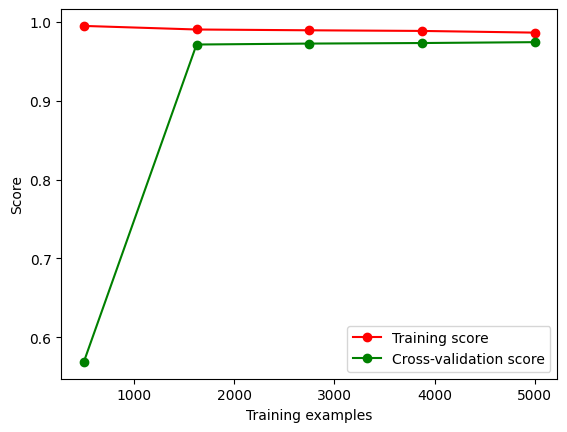

Voting Classifier: Accuracy = 0.9742999999999999, Precision = 0.8480392156862746


In [28]:
# Voting Ensemble

from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Initialize the VotingClassifier
voting_clf = VotingClassifier(
   estimators=[('rf', RandomForestClassifier()),
               ('lr', LogisticRegression()),
               ('svc', SVC()),
               ('dt', DecisionTreeClassifier()),
               ('knn', KNeighborsClassifier()),
               ('nb', GaussianNB()),
               ('gb', GradientBoostingClassifier())],
   voting='hard' # or 'soft' for averaging probabilities
)

skf = StratifiedKFold(n_splits=2)
train_sizes, train_scores, test_scores = learning_curve(voting_clf, X_T, y_T, cv=skf, scoring='accuracy')

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Fit the VotingClassifier
voting_clf.fit(X_T, y_T)

# Print the accuracy and precision
accuracy = cross_val_score(voting_clf, X_T, y_T, cv=skf, scoring='accuracy').mean()
precision = cross_val_score(voting_clf, X_T, y_T, cv=skf, scoring='precision').mean()
print(f'Voting Classifier: Accuracy = {accuracy}, Precision = {precision}')

In [ ]:
# Stacking Ensemble
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Initialize the StackingClassifier
stacking_clf = StackingClassifier(
   estimators=[('rf', RandomForestClassifier()),
               ('lr', LogisticRegression()),
               ('svc', SVC()),
               ('dt', DecisionTreeClassifier()),
               ('knn', KNeighborsClassifier()),
               ('nb', GaussianNB()),
               ('gb', GradientBoostingClassifier())],
   final_estimator=LogisticRegression() # or any other classifier
)

skf = StratifiedKFold(n_splits=2)
train_sizes, train_scores, test_scores = learning_curve(stacking_clf, X_T, y_T, cv=skf, scoring='accuracy')

plt.figure()
plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores.mean(axis=1), 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

# Fit the StackingClassifier
stacking_clf.fit(X_T, y_T)

# Print the accuracy and precision
accuracy = cross_val_score(stacking_clf, X_T, y_T, cv=skf, scoring='accuracy').mean()
precision = cross_val_score(stacking_clf, X_T, y_T, cv=skf, scoring='precision').mean()
print(f'Stacking Classifier: Accuracy = {accuracy}, Precision = {precision}')


In [ ]:
# Adaboost Ensemble

from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_T, y_T, test_size=0.2, random_state=42)

# Define the AdaBoost model with Logistic Regression as the base estimator
ada = AdaBoostClassifier(LogisticRegression(C=0.3, penalty='l2'), n_estimators=60)

# Fit the model
ada.fit(X_train, y_train)

# Make predictions
ada_preds = ada.predict(X_test)

# Calculate accuracy and precision
ada_accuracy = accuracy_score(y_test, ada_preds)
ada_precision = precision_score(y_test, ada_preds)

print("AdaBoost Accuracy: ", ada_accuracy)
print("AdaBoost Precision: ", ada_precision)


In [ ]:
# Extra: Bagging Approach

from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score
from sklearn.model_selection import train_test_split

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_T, y_T, test_size=0.2, random_state=42)

# Define the Bagging model with Logistic Regression as the base estimator
bag = BaggingClassifier(LogisticRegression(C=0.1, penalty='l2'), n_estimators=50)

# Fit the model
bag.fit(X_train, y_train)

# Make predictions
bag_preds = bag.predict(X_test)

# Calculate accuracy and precision
bag_accuracy = accuracy_score(y_test, bag_preds)
bag_precision = precision_score(y_test, bag_preds)

print("Bagging Accuracy: ", bag_accuracy)
print("Bagging Precision: ", bag_precision)
